In [2]:
import keras
import keras.datasets
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import pandas as pd
import hyperparams

In [3]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']

In [15]:

params = {
    #Training Level Hyper Params
    "epochs": 200,
    "lr": 0.001,
    "batch_size": 2048,
    "opt": keras.optimizers.Adam,
    #Network Level HyperParam
    "conv_layers":{
        1: [Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28,28,1),padding='same',strides=(2,2) )],
        2: [LeakyReLU(alpha=0.1)],
        3: [keras.layers.BatchNormalization()],
        4: [MaxPooling2D((2, 2),padding='same')],
        
    },
    "conn_layers":{
        1: [Dense(128, activation='linear')],
        2: [LeakyReLU(alpha=0.1)],
        3: [Dense(10, activation='softmax')],
    },
}


In [16]:
class FashionData:
    
    def __init__(self):
        # Setup train and test splits
        (self.x_train, self.y_train), (self.x_test, self.y_test) = fashion_mnist.load_data()
        print("Training label shape: ", self.y_train.shape) 
        print("Training Data Shape", self.x_train.shape)
    
    def MakeGenericModel (self, hyperP):
        
            modelH = Sequential()
            
            for i in range(1, len(hyperP['conv_layers'])+1):
                modelH.add(hyperP['conv_layers'][i][0])
            modelH.add(Flatten())
            for i in range(1, len(hyperP['conn_layers'])+1):
                modelH.add(hyperP['conn_layers'][i][0])
            #Final Layer
            

            opt =hyperP["opt"](hyperP["lr"])
            modelH.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
            print ("Model Created")
            modelH.summary()
        
            return modelH
        
    def get_data(self):
        return self.train_X,self.valid_X,self.train_label,self.valid_label, self.x_test, self.y_test
        
    
    
    def create_validation_data(self):
        self.train_X,self.valid_X,self.train_label,self.valid_label = train_test_split(self.x_train, self.y_train, 
                                                           test_size=0.2, random_state=13)
        #print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)
        
        
    
    # Convert to "one-hot" vectors using the to_categorical function
    def one_hot_encoding(self):
        
        self.x_train = self.x_train/255
        self.x_test = self.x_test/255
        self.x_train = self.x_train.reshape( -1, 28,28,1)
        self.x_test = self.x_test.reshape( -1, 28,28,1)
        self.y_train = to_categorical(self.y_train)
        self.y_test = to_categorical(self.y_test)
        print("Shape after normalizing and one hot encoding")
        print(self.x_train.shape, self.x_test.shape, self.y_train.shape, self.y_test.shape)
        

    
        
   
        
    def plot_accuracy_graph(self, history):
        evaluation = pd.DataFrame(history.history)
        evaluation[['accuracy', 'val_accuracy']].plot()
        evaluation[['loss', 'val_loss']].plot()

                
    def predict(self, img, model):
        result = np.around(model.predict(img)[0])
        max1 = max(result)
        return np.where(result == max1)[0][0]

In [17]:
fd = FashionData()
fd.one_hot_encoding()
fd.create_validation_data()

Training label shape:  (60000,)
Training Data Shape (60000, 28, 28)
Shape after normalizing and one hot encoding
(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [23]:
modelH= fd.MakeGenericModel(params)

Model Created
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               200832    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 128)

In [24]:
train_X,valid_X,train_label,valid_label, x_test, y_test=fd.get_data()

In [25]:
from keras.callbacks import ModelCheckpoint
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 3, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
history = modelH.fit(train_X, train_label, batch_size=params['batch_size'], epochs=params['epochs'], verbose=2, validation_split=.2,callbacks=callbacks_list)

Epoch 1/200

Epoch 00001: val_loss improved from inf to 1.71564, saving model to Weights-001--1.71564.hdf5
19/19 - 6s - loss: 0.8573 - accuracy: 0.6986 - val_loss: 1.7156 - val_accuracy: 0.6494
Epoch 2/200

Epoch 00002: val_loss improved from 1.71564 to 1.66785, saving model to Weights-002--1.66785.hdf5
19/19 - 7s - loss: 0.4425 - accuracy: 0.8424 - val_loss: 1.6678 - val_accuracy: 0.7151
Epoch 3/200

Epoch 00003: val_loss improved from 1.66785 to 1.61514, saving model to Weights-003--1.61514.hdf5
19/19 - 6s - loss: 0.3773 - accuracy: 0.8657 - val_loss: 1.6151 - val_accuracy: 0.7915
Epoch 4/200

Epoch 00004: val_loss improved from 1.61514 to 1.55723, saving model to Weights-004--1.55723.hdf5
19/19 - 6s - loss: 0.3414 - accuracy: 0.8764 - val_loss: 1.5572 - val_accuracy: 0.8037
Epoch 5/200

Epoch 00005: val_loss improved from 1.55723 to 1.48315, saving model to Weights-005--1.48315.hdf5
19/19 - 6s - loss: 0.3123 - accuracy: 0.8882 - val_loss: 1.4832 - val_accuracy: 0.7933
Epoch 6/200

E

Epoch 46/200

Epoch 00046: val_loss did not improve from 0.26913
19/19 - 5s - loss: 0.0592 - accuracy: 0.9839 - val_loss: 0.3184 - val_accuracy: 0.9076
Epoch 47/200

Epoch 00047: val_loss did not improve from 0.26913
19/19 - 5s - loss: 0.0573 - accuracy: 0.9848 - val_loss: 0.3240 - val_accuracy: 0.9067
Epoch 48/200

Epoch 00048: val_loss did not improve from 0.26913
19/19 - 5s - loss: 0.0511 - accuracy: 0.9875 - val_loss: 0.3387 - val_accuracy: 0.9048
Epoch 49/200

Epoch 00049: val_loss did not improve from 0.26913
19/19 - 5s - loss: 0.0547 - accuracy: 0.9852 - val_loss: 0.3503 - val_accuracy: 0.8981
Epoch 50/200

Epoch 00050: val_loss did not improve from 0.26913
19/19 - 5s - loss: 0.0553 - accuracy: 0.9834 - val_loss: 0.3340 - val_accuracy: 0.9084
Epoch 51/200

Epoch 00051: val_loss did not improve from 0.26913
19/19 - 5s - loss: 0.0464 - accuracy: 0.9883 - val_loss: 0.3358 - val_accuracy: 0.9069
Epoch 52/200

Epoch 00052: val_loss did not improve from 0.26913
19/19 - 5s - loss: 0.04

Epoch 100/200

Epoch 00100: val_loss did not improve from 0.26913
19/19 - 5s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.4901 - val_accuracy: 0.9042
Epoch 101/200

Epoch 00101: val_loss did not improve from 0.26913
19/19 - 5s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.4892 - val_accuracy: 0.9050
Epoch 102/200

Epoch 00102: val_loss did not improve from 0.26913
19/19 - 5s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.4928 - val_accuracy: 0.9049
Epoch 103/200

Epoch 00103: val_loss did not improve from 0.26913
19/19 - 5s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.4999 - val_accuracy: 0.9034
Epoch 104/200

Epoch 00104: val_loss did not improve from 0.26913
19/19 - 5s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.4985 - val_accuracy: 0.9049
Epoch 105/200

Epoch 00105: val_loss did not improve from 0.26913
19/19 - 5s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.4999 - val_accuracy: 0.9054
Epoch 106/200

Epoch 00106: val_loss did not improve from 0.26913
19/19 - 5s - los

Epoch 154/200

Epoch 00154: val_loss did not improve from 0.26913
19/19 - 7s - loss: 9.3075e-04 - accuracy: 1.0000 - val_loss: 0.5861 - val_accuracy: 0.9044
Epoch 155/200

Epoch 00155: val_loss did not improve from 0.26913
19/19 - 7s - loss: 8.8603e-04 - accuracy: 1.0000 - val_loss: 0.5886 - val_accuracy: 0.9043
Epoch 156/200

Epoch 00156: val_loss did not improve from 0.26913
19/19 - 7s - loss: 8.9009e-04 - accuracy: 1.0000 - val_loss: 0.5898 - val_accuracy: 0.9048
Epoch 157/200

Epoch 00157: val_loss did not improve from 0.26913
19/19 - 7s - loss: 8.4627e-04 - accuracy: 1.0000 - val_loss: 0.5904 - val_accuracy: 0.9050
Epoch 158/200

Epoch 00158: val_loss did not improve from 0.26913
19/19 - 7s - loss: 8.3640e-04 - accuracy: 1.0000 - val_loss: 0.5919 - val_accuracy: 0.9045
Epoch 159/200

Epoch 00159: val_loss did not improve from 0.26913
19/19 - 7s - loss: 8.1282e-04 - accuracy: 1.0000 - val_loss: 0.5934 - val_accuracy: 0.9053
Epoch 160/200

Epoch 00160: val_loss did not improve from 

In [89]:
print("Training Accuracy", " : ", modelH.evaluate(train_X, train_label, verbose=False)[1])
print("Testing Accuracy",  " : ", modelH.evaluate(x_test, y_test, verbose=False)[1])

Training Accuracy  :  0.7198958396911621
Testing Accuracy  :  0.7128999829292297


In [21]:
y_test[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

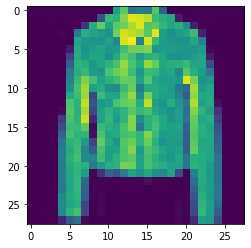

Prediction :  T-shirt/top


In [22]:
index = 10
img = x_test[index]
img.shape = (28,28)
plt.imshow(img)
plt.show()
print("Prediction : ", classes[fd.predict(x_test[index:index+1], modelH)])

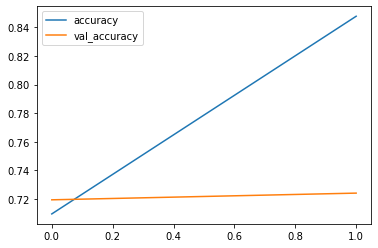

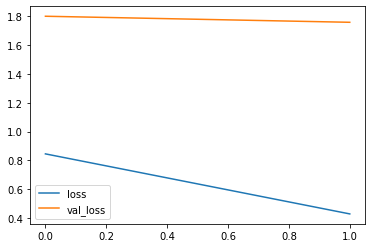

In [91]:
fd.plot_accuracy_graph(history)

# For Learning rate

In [92]:
lr =[0.1, 0.01,  1, 0.5, 0.05]
newModel1=[]
for i in range(len(lr)):
    params = {
        #Training Level Hyper Params
        "epochs": 2,
        "lr": i,
        "batch_size": 2048,
        "opt": keras.optimizers.Adam,
        #Network Level HyperParam
        "conv_layers":{
            1: [Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28,28,1),padding='same')],
            2: [LeakyReLU(alpha=0.1)],
            3: [MaxPooling2D((2, 2),padding='same')],
        },
        "conn_layers":{
            1: [Dense(128, activation='linear')],
            2: [LeakyReLU(alpha=0.1)],
            3: [Dense(10, activation='softmax')],
        },
    }
    newModel1.append(fd.MakeGenericModel(params))

Model Created
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_51 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               802944    
_________________________________________________________________
leaky_re_lu_52 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)

In [93]:
for i in range(len(lr)):
    newModel1[i].fit(train_X, train_label, batch_size=params['batch_size'], epochs=params['epochs'], verbose=2, validation_split=.2,callbacks=callbacks_list)
    

Epoch 1/2

Epoch 00001: val_loss did not improve from 1.75758
19/19 - 6s - loss: 2.3002 - accuracy: 0.0833 - val_loss: 2.3024 - val_accuracy: 0.0817
Epoch 2/2

Epoch 00002: val_loss did not improve from 1.75758
19/19 - 7s - loss: 2.3002 - accuracy: 0.0833 - val_loss: 2.3024 - val_accuracy: 0.0817
Epoch 1/2

Epoch 00001: val_loss did not improve from 1.75758
19/19 - 7s - loss: 82976.3438 - accuracy: 0.1581 - val_loss: 96351.1484 - val_accuracy: 0.1904
Epoch 2/2

Epoch 00002: val_loss did not improve from 1.75758
19/19 - 7s - loss: 54149.2734 - accuracy: 0.4443 - val_loss: 16806.6914 - val_accuracy: 0.6054
Epoch 1/2

Epoch 00001: val_loss did not improve from 1.75758
19/19 - 7s - loss: 684783.3750 - accuracy: 0.1661 - val_loss: 580135.6250 - val_accuracy: 0.1856
Epoch 2/2

Epoch 00002: val_loss did not improve from 1.75758
19/19 - 7s - loss: 358744.0000 - accuracy: 0.3128 - val_loss: 105514.7500 - val_accuracy: 0.4646
Epoch 1/2

Epoch 00001: val_loss did not improve from 1.75758
19/19 - 

In [94]:
test_acc=[]
for i in range(len(lr)):
    print("Training Accuracy", lr[i], " : ", newModel1[i].evaluate(train_X, train_label, verbose=False)[1])
    print("Testing Accuracy", lr[i], " : ", newModel1[i].evaluate(x_test, y_test, verbose=False)[1])
    test_acc.append(newModel1[i].evaluate(x_test, y_test, verbose=False)[1])
max_index = np.argmax(test_acc)
key = lr[max_index]
print("Best learning rate", key, " with accuracy of ", test_acc[max_index])

    

Training Accuracy 0.1  :  0.08297916501760483
Testing Accuracy 0.1  :  0.08810000121593475
Training Accuracy 0.01  :  0.6074791550636292
Testing Accuracy 0.01  :  0.600600004196167
Training Accuracy 1  :  0.4672708213329315
Testing Accuracy 1  :  0.4657999873161316
Training Accuracy 0.5  :  0.6334999799728394
Testing Accuracy 0.5  :  0.6251000165939331
Training Accuracy 0.05  :  0.6498333215713501
Testing Accuracy 0.05  :  0.6371999979019165
Best learning rate 0.05  with accuracy of  0.6371999979019165


# For No. of Conv and Maxpool Layers

In [96]:
no_layers = [3,6,9]
layers = {
    1: [Conv2D(32, kernel_size=(3, 3), activation = "linear", input_shape=(28,28,1),padding='same')],
    2: [LeakyReLU(alpha=0.1)],
    3: [MaxPooling2D((2, 2),padding='same')],
    4: [Conv2D(32, kernel_size=(3, 3), activation = "linear", input_shape=(28,28,1),padding='same')],
    5: [LeakyReLU(alpha=0.1)],
    6: [MaxPooling2D((2, 2),padding='same')],
    7: [Conv2D(32, kernel_size=(3, 3), activation = "linear", input_shape=(28,28,1),padding='same')],
    8: [LeakyReLU(alpha=0.1)],
    9: [MaxPooling2D((2, 2),padding='same')],
}
newModel2=[]
for i in no_layers:
    params = {
        #Training Level Hyper Params
        "epochs": 2,
        "lr": 0.001,
        "batch_size": 2048,
        "opt": keras.optimizers.Adam,
        #Network Level HyperParam
        "conv_layers":dict((i, layers[i]) for i in range(1,i+1)),
        "conn_layers":{
            1: [Dense(128, activation='linear')],
            2: [LeakyReLU(alpha=0.1)],
            3: [Dense(10, activation='softmax')],
        },
    }
    newModel2.append(fd.MakeGenericModel(params))
    


Model Created
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_67 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_65 (Dense)             (None, 128)               802944    
_________________________________________________________________
leaky_re_lu_70 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 10)

In [97]:
for i in range(0, len(no_layers)):
    newModel2[i].fit(train_X, train_label, batch_size=params['batch_size'], epochs=params['epochs'], verbose=2, validation_split=.2,callbacks=callbacks_list)   

Epoch 1/2

Epoch 00001: val_loss improved from 1.75758 to 0.59618, saving model to Weights-001--0.59618.hdf5
19/19 - 6s - loss: 1.0356 - accuracy: 0.6655 - val_loss: 0.5962 - val_accuracy: 0.7878
Epoch 2/2

Epoch 00002: val_loss improved from 0.59618 to 0.46414, saving model to Weights-002--0.46414.hdf5
19/19 - 7s - loss: 0.5220 - accuracy: 0.8177 - val_loss: 0.4641 - val_accuracy: 0.8446
Epoch 1/2

Epoch 00001: val_loss did not improve from 0.46414
19/19 - 11s - loss: 1.3606 - accuracy: 0.5612 - val_loss: 0.7273 - val_accuracy: 0.7382
Epoch 2/2

Epoch 00002: val_loss did not improve from 0.46414
19/19 - 11s - loss: 0.6426 - accuracy: 0.7688 - val_loss: 0.5571 - val_accuracy: 0.7948
Epoch 1/2

Epoch 00001: val_loss did not improve from 0.46414
19/19 - 12s - loss: 1.3739 - accuracy: 0.5538 - val_loss: 0.7884 - val_accuracy: 0.7083
Epoch 2/2

Epoch 00002: val_loss did not improve from 0.46414
19/19 - 12s - loss: 0.7106 - accuracy: 0.7398 - val_loss: 0.6299 - val_accuracy: 0.7665


In [98]:
test_acc=[]
for i in range(0, len(no_layers)):
    print("Training Accuracy", no_layers[i], " : ", newModel2[i].evaluate(train_X, train_label, verbose=False)[1])
    print("Testing Accuracy", no_layers[i], " : ", newModel2[i].evaluate(x_test, y_test, verbose=False)[1])
    test_acc.append(newModel2[i].evaluate(x_test, y_test, verbose=False)[1])
max_index = np.argmax(test_acc)
key = no_layers[max_index]
print("Best no of layers are ", key, " with accuracy of ", test_acc[max_index])

Training Accuracy 3  :  0.7942916750907898
Testing Accuracy 3  :  0.7822999954223633
Training Accuracy 6  :  0.7757916450500488
Testing Accuracy 6  :  0.7702000141143799
Training Accuracy 9  :  0.7706458568572998
Testing Accuracy 9  :  0.7646999955177307
Best no of layers are  3  with accuracy of  0.7822999954223633


# For no. of Fully Connected layers

In [99]:
no_layers_conn = [2,4,6]
layers1 = {
    1: [Dense(128, activation='linear')],
    2: [LeakyReLU(alpha=0.1)],
    3: [Dense(128, activation='linear')],
    4: [LeakyReLU(alpha=0.1)],
    5: [Dense(128, activation='linear')],
    6: [LeakyReLU(alpha=0.1)],
}
newModel3=[]

for i in no_layers_conn:
    temp = i+1
    dict1 = dict((i, layers1[i]) for i in range(1,i+1))
    dict1.update({temp: [Dense(10, activation='softmax')]})
    print(dict1)
    params = {
        #Training Level Hyper Params
        "epochs": 2,
        "lr": 0.001,
        "batch_size": 2048,
        "opt": keras.optimizers.Adam,
        #Network Level HyperParam
        "conv_layers":{
            1: [Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28,28,1),padding='same')],
            2: [LeakyReLU(alpha=0.1)],
            3: [MaxPooling2D((2, 2),padding='same')],
        },
        "conn_layers": dict1,
    }
    newModel3.append(fd.MakeGenericModel(params))
    


{1: [<tensorflow.python.keras.layers.core.Dense object at 0x0000019A0C666C70>], 2: [<tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x0000019A0C5D6EB0>], 3: [<tensorflow.python.keras.layers.core.Dense object at 0x0000019A0C6A00D0>]}
Model Created
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_76 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_71 (Dense)             (None, 128)     

In [100]:
for i in range(0, len(no_layers_conn)):
    newModel3[i].fit(train_X, train_label, batch_size=params['batch_size'], epochs=params['epochs'], verbose=2, validation_split=.2,callbacks=callbacks_list)   

Epoch 1/2

Epoch 00001: val_loss did not improve from 0.46414
19/19 - 6s - loss: 1.0425 - accuracy: 0.6684 - val_loss: 0.5802 - val_accuracy: 0.7993
Epoch 2/2

Epoch 00002: val_loss improved from 0.46414 to 0.44697, saving model to Weights-002--0.44697.hdf5
19/19 - 6s - loss: 0.5079 - accuracy: 0.8240 - val_loss: 0.4470 - val_accuracy: 0.8425
Epoch 1/2

Epoch 00001: val_loss did not improve from 0.44697
19/19 - 7s - loss: 1.4140 - accuracy: 0.5503 - val_loss: 0.7113 - val_accuracy: 0.7584
Epoch 2/2

Epoch 00002: val_loss did not improve from 0.44697
19/19 - 7s - loss: 0.5887 - accuracy: 0.7951 - val_loss: 0.5138 - val_accuracy: 0.8110
Epoch 1/2

Epoch 00001: val_loss did not improve from 0.44697
19/19 - 7s - loss: 1.3136 - accuracy: 0.5786 - val_loss: 0.6626 - val_accuracy: 0.7628
Epoch 2/2

Epoch 00002: val_loss did not improve from 0.44697
19/19 - 7s - loss: 0.5741 - accuracy: 0.7900 - val_loss: 0.5156 - val_accuracy: 0.8068


In [101]:
test_acc=[]
for i in range(0, len(no_layers)):
    print("Training Accuracy", no_layers_conn[i], " : ", newModel3[i].evaluate(train_X, train_label, verbose=False)[1])
    print("Testing Accuracy", no_layers_conn[i], " : ", newModel3[i].evaluate(x_test, y_test, verbose=False)[1])
    test_acc.append(newModel3[i].evaluate(x_test, y_test, verbose=False)[1])
max_index = np.argmax(test_acc)
key = no_layers_conn[max_index]
print("Best no of fully connected layers are ", key, " with accuracy of ", test_acc[max_index])

Training Accuracy 2  :  0.6620625257492065
Testing Accuracy 2  :  0.6521999835968018
Training Accuracy 4  :  0.6551666855812073
Testing Accuracy 4  :  0.6514000296592712
Training Accuracy 6  :  0.8040624856948853
Testing Accuracy 6  :  0.7965999841690063
Best no of fully connected layers are  6  with accuracy of  0.7965999841690063


# For optimizers

In [102]:
newModel4=[]
for i in range(len(hyperparams.optimizers)):
    params = {
        #Training Level Hyper Params
        "epochs": 2,
        "lr": 0.001,
        "batch_size": 2048,
        "opt": hyperparams.optimizers[i],
        #Network Level HyperParam
        "conv_layers":{
            1: [Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28,28,1),padding='same')],
            2: [LeakyReLU(alpha=0.1)],
            3: [MaxPooling2D((2, 2),padding='same')],
        },
        "conn_layers":{
            1: [Dense(128, activation='linear')],
            2: [LeakyReLU(alpha=0.1)],
            3: [Dense(10, activation='softmax')],
        },
    }
    newModel4.append(fd.MakeGenericModel(params))

Model Created
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_79 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_77 (Dense)             (None, 128)               802944    
_________________________________________________________________
leaky_re_lu_80 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 10)

In [103]:
for i in range(len(hyperparams.optimizers)):
    newModel4[i].fit(train_X, train_label, batch_size=params['batch_size'], epochs=params['epochs'], verbose=2, validation_split=.2,callbacks=callbacks_list)

Epoch 1/2

Epoch 00001: val_loss did not improve from 0.44697
19/19 - 7s - loss: 1.0682 - accuracy: 0.6667 - val_loss: 0.5836 - val_accuracy: 0.7977
Epoch 2/2

Epoch 00002: val_loss improved from 0.44697 to 0.44342, saving model to Weights-002--0.44342.hdf5
19/19 - 7s - loss: 0.5023 - accuracy: 0.8266 - val_loss: 0.4434 - val_accuracy: 0.8453
Epoch 1/2

Epoch 00001: val_loss did not improve from 0.44342
19/19 - 7s - loss: 1.1103 - accuracy: 0.6318 - val_loss: 0.6381 - val_accuracy: 0.7786
Epoch 2/2

Epoch 00002: val_loss did not improve from 0.44342
19/19 - 8s - loss: 0.6218 - accuracy: 0.7752 - val_loss: 0.6801 - val_accuracy: 0.7879
Epoch 1/2

Epoch 00001: val_loss did not improve from 0.44342
19/19 - 8s - loss: 2.2996 - accuracy: 0.1551 - val_loss: 2.2816 - val_accuracy: 0.1934
Epoch 2/2

Epoch 00002: val_loss did not improve from 0.44342
19/19 - 7s - loss: 2.2664 - accuracy: 0.2433 - val_loss: 2.2501 - val_accuracy: 0.2868
Epoch 1/2

Epoch 00001: val_loss did not improve from 0.443

In [104]:
test_acc=[]
for i in range(len(hyperparams.optimizers)):
    print("Training Accuracy",hyperparams.optimizers[i] , " : ", newModel4[i].evaluate(train_X, train_label, verbose=False)[1])
    print("Testing Accuracy", hyperparams.optimizers[i], " : ", newModel4[i].evaluate(x_test, y_test, verbose=False)[1])
    test_acc.append(newModel4[i].evaluate(x_test, y_test, verbose=False)[1])
max_index = np.argmax(test_acc)
key = hyperparams.optimizers[max_index]
print("Best Optimizer is ", key, " with accuracy of ", test_acc[max_index])

Training Accuracy <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>  :  0.8455208539962769
Testing Accuracy <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>  :  0.8343999981880188
Training Accuracy <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>  :  0.7883333563804626
Testing Accuracy <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>  :  0.7828999757766724
Training Accuracy <class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>  :  0.29006248712539673
Testing Accuracy <class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>  :  0.28439998626708984
Training Accuracy <class 'tensorflow.python.keras.optimizer_v2.adamax.Adamax'>  :  0.8248124718666077
Testing Accuracy <class 'tensorflow.python.keras.optimizer_v2.adamax.Adamax'>  :  0.8127999901771545
Training Accuracy <class 'tensorflow.python.keras.optimizer_v2.nadam.Nadam'>  :  0.8142499923706055
Testing Accuracy <class 'tensorflow.python.keras.optimizer_v2.nadam.Nadam'>  :  0.8036

# For activation

In [27]:
newModel5=[]
for i in range(len(hyperparams.activation)):
    params = {
        #Training Level Hyper Params
        "epochs": 2,
        "lr": 0.001,
        "batch_size": 2048,
        "opt": keras.optimizers.Adam,
        
        #Network Level HyperParam
        "conv_layers":{
            1: [Conv2D(32, kernel_size=(3, 3), activation=hyperparams.activation[i], input_shape=(28,28,1),padding='same') ],
            2: [LeakyReLU(alpha=0.1)],
            
            3: [MaxPooling2D((2, 2),padding='same')],
        },
        "conn_layers":{
            1: [Dense(128, activation='linear', kernel)],
            2: [LeakyReLU(alpha=0.1)],
            3: [Dense(10, activation='softmax')],
        },
    }
    newModel5.append(fd.MakeGenericModel(params))

Model Created
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               802944    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10) 

IndexError: list index out of range

In [59]:
params = {
    #Training Level Hyper Params
    "epochs": 20,
    "lr": 1,
    "batch_size": 2048,
    "opt": keras.optimizers.Adam,
     #l22 = tf.keras.regularizers.l2(l2=0.02)
    #Network Level HyperParam
    "conv_layers":{
        1: [Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28,28,1),padding='same', kernel_regularizer="l2") ],
        2: [LeakyReLU(alpha=0.1)],
        3: [MaxPooling2D((2, 2),padding='same')],
        4: [keras.layers.Dropout(0.2)]
    },
    "conn_layers":{
        1: [Dense(128, activation='linear', kernel_regularizer="l2")],
        2: [LeakyReLU(alpha=0.1)],
        3: [keras.layers.Dropout(0.2)],
        4: [Dense(10, activation='softmax')],
     },
    }
modelH = fd.MakeGenericModel(params)

Model Created
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_38 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               802944    
_________________________________________________________________
leaky_re_lu_39 (LeakyReLU)   (None, 128

In [60]:
modelH.fit(train_X, train_label, batch_size=params['batch_size'], epochs=params['epochs'], verbose=2, validation_split=.2,callbacks=callbacks_list)

Epoch 1/20

Epoch 00001: val_loss did not improve from 0.62623
19/19 - 9s - loss: 130411.8438 - accuracy: 0.1768 - val_loss: 79366.2500 - val_accuracy: 0.5329
Epoch 2/20

Epoch 00002: val_loss did not improve from 0.62623
19/19 - 10s - loss: 68006.9062 - accuracy: 0.5080 - val_loss: 41164.7188 - val_accuracy: 0.6899
Epoch 3/20

Epoch 00003: val_loss did not improve from 0.62623
19/19 - 9s - loss: 29075.3672 - accuracy: 0.6712 - val_loss: 14782.7686 - val_accuracy: 0.7375
Epoch 4/20

Epoch 00004: val_loss did not improve from 0.62623
19/19 - 8s - loss: 13876.7900 - accuracy: 0.6313 - val_loss: 10307.5117 - val_accuracy: 0.6758
Epoch 5/20

Epoch 00005: val_loss did not improve from 0.62623
19/19 - 8s - loss: 9601.0742 - accuracy: 0.6470 - val_loss: 6054.5195 - val_accuracy: 0.7654
Epoch 6/20

Epoch 00006: val_loss did not improve from 0.62623
19/19 - 8s - loss: 5756.6450 - accuracy: 0.6753 - val_loss: 9959.6035 - val_accuracy: 0.4596
Epoch 7/20

Epoch 00007: val_loss did not improve from